<a href="https://colab.research.google.com/github/scarmonaf/PRACTICA_ML/blob/main/Practica_Final_ML_NS_vFinal_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA FINAL MACHINE LEARNING**

### *El conjunto de datos con el que se trabajará será el de la aseguradora de accidentes de coches en Canadá*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.pipeline import Pipeline
from sklearn import metrics
!pip install category_encoders
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve, accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mutual_info_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.1 MB/s eta 0:00:00


## **1. Análisis exploratorio incial**

Los pasos a realizar en este primer apartado serán los siguientes:
1. Análisis inicial de los datos


> 1.1.1 ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son más propensos a tener accidentes (acción correctiva en prima)?


> 1.1.2 ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son menos propensos a tener accidentes (descuento en prima)?

2. Tratamiento de variables categoricas: encoding
3. Correlaciones, tratamiento de missing y outliers
4. Aplicación de técnicas no supervisadas: PCA y autoencoder

In [ ]:
df = pd.read_csv("NCDB_1999_to_2014.csv")

#### **1.1 Análisis inicial de datos**

Tipos de datos, dimensión y preprocesamiento de las variables

In [ ]:
# Tipos de datos
df.dtypes.to_dict()

{'C_YEAR': dtype('int64'),
 'C_MNTH': dtype('O'),
 'C_WDAY': dtype('O'),
 'C_HOUR': dtype('O'),
 'C_SEV': dtype('int64'),
 'C_VEHS': dtype('O'),
 'C_CONF': dtype('O'),
 'C_RCFG': dtype('O'),
 'C_WTHR': dtype('O'),
 'C_RSUR': dtype('O'),
 'C_RALN': dtype('O'),
 'C_TRAF': dtype('O'),
 'V_ID': dtype('O'),
 'V_TYPE': dtype('O'),
 'V_YEAR': dtype('O'),
 'P_ID': dtype('O'),
 'P_SEX': dtype('O'),
 'P_AGE': dtype('O'),
 'P_PSN': dtype('O'),
 'P_ISEV': dtype('O'),
 'P_SAFE': dtype('O'),
 'P_USER': dtype('O')}

La mayoría de las variables del dataset son de tipo object, debido a la presencia de valores no numéricos en muchos de ellos. Es importante destacar también que la gran parte de las variables son categóricas (son variables cualitativas con etiquetas o códigos para representar su verdadero significado) y también hay algunas que son identificadas por el tipo object por contener algun valor alfabético, pero en realidad son numéricas porque musetran información meramente de tipo numérica (como por ejemplo P_AGE, que muestra la edad de la persona)

In [ ]:
# Dimensión:
print(df.shape, df.drop_duplicates().shape)

(20000, 22) (20000, 22)


*Nota: El dataset se compone de un número muy elevado de registros, por lo que no es conveniente emplear el conjunto de datos al completo ya que pueden existir problemas de rendimiento cuando apliquemos los algoritmos posteriormente. Por tanto, nosotros hemos reducido el tamaño del dataset a 20.000 registros*

In [ ]:
# Análisis estadístico general
df.describe(include = "all")

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
count,20000.000000,20000,20000,20000,20000.000000,20000,20000,20000,20000,20000,...,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
unique,NaN,15,8,25,NaN,44,20,11,9,11,...,30,20,55,27,4,99,15,5,8,6
top,NaN,7,5,16,NaN,2,21,02,1,1,...,01,01,UUUU,01,M,UU,11,2,02,1
freq,NaN,1872,3408,1831,NaN,6254,6021,9490,13932,13217,...,6740,16569,1134,14244,10841,1291,13475,10492,14259,12562
mean,2005.986300,NaN,NaN,NaN,1.983500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.585135,NaN,NaN,NaN,0.127391,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1999.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2002.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2006.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2010.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Con este primer análisis podemos observar algunos estadísticos relevantes de cada una de las variables del dataset. Se puede apreciar una gran cantidad de datos NaN: esto es debido a que la mayoría de las variables del dataset son de tipo object (ya que contienen algun valor no numérico como pueden ser aquellas variables que contienen algún valor Q, N, U y/o X). Para estas variables de tipo object, la función describe de pandas solo calcula el count, unique, top y freq. Para las que son de tipo int64 (numerico entero) no se calcula el unique, top y freq. Por tanto, para trabajar con la base de datos es importante tratar las variables adecuadamente incluyendo las transformaciones necesarias que realizaremos a continuación. 

Para analizar más en profundidad los datos, podríamos visualizar algunos gráficos interesantes de las relaciones entre algunas de las variables más relevantes del dataset. Sin embargo, para ello primero tendríamos que tratar antes las variables. Un primer acercamiento para realizar este tratamiento sería el de la sustitución de los valores alfabéticos de todas las variables por NaN. Es importante resaltar que esto lo vamos a realizar únicamente para ver estas relaciones gráficas entre variables, en el siguiente apartado realizaremos un mejor procesamiento de las variables teniendo en cuenta su naturaleza. Primero vamos a transformar todas las variables para que sean numéricas. Para ello primero tendremos que tratar los valores no numéricos (Q,N,U,X) que los convertiremos a NaN (valores missing). Para poder hacer esto, hay que cambiar los valores de la columna del genero de la persona ya que vienen en valores no numericos (F y M) y se transformarian todos en valores NaN. Asignaremos el valor 0 a las mujeres y 1 a los hombres

In [ ]:
df2 = pd.read_csv("NCDB_1999_to_2014.csv")

def genero(columna):
    if columna=="F":
        return 0
    elif columna=="M":
        return 1
    else:
        return columna
df2["P_SEX"]=df2["P_SEX"].map(genero)

# Creamos la funcion que cambia los valores no numericos (Q,N,U,X) a NaN
def str_to_int(columna):
    try:
        newvalue=int(columna)
    except:
        newvalue=None
    return newvalue

# Creamos otra funcion que aplique la funcion anterior a todas las columnas del dataset y las cambiaremos de nombre para 
# distinguirlas

columnas_transformadas=[]
for i,pos in enumerate(df2.columns.tolist()):

    if pos[:2]=="V_":
        columnas_transformadas.append(pos[2:]+"V")
        df2[pos[2:]+"V"]=df2[pos].map(str_to_int)
    elif pos[:2]=="C_":
        columnas_transformadas.append(pos[2:]+"C")
        df2[pos[2:]+"C"]=df2[pos].map(str_to_int)
    elif pos[:2]=="P_":
        columnas_transformadas.append(pos[2:]+"P")
        df2[pos[2:]+"P"]=df2[pos].map(str_to_int)
        
pd.set_option('display.max_columns', None)
df2=df2.loc[:, columnas_transformadas]
df2.head()

,YEARC,MNTHC,WDAYC,HOURC,SEVC,VEHSC,CONFC,RCFGC,WTHRC,RSURC,RALNC,TRAFC,IDV,TYPEV,YEARV,IDP,SEXP,AGEP,PSNP,ISEVP,SAFEP,USERP
0,2001,5.0,5.0,16.0,2,2.0,33.0,2.0,1.0,1.0,1.0,18.0,1.0,1.0,1986.0,2.0,1.0,15.0,13.0,1.0,NaN,2.0
1,2008,10.0,3.0,13.0,2,2.0,21.0,2.0,1.0,1.0,1.0,18.0,2.0,5.0,2002.0,2.0,1.0,4.0,23.0,1.0,2.0,2.0
2,2009,8.0,7.0,9.0,2,2.0,36.0,2.0,1.0,1.0,1.0,18.0,2.0,1.0,2004.0,2.0,0.0,17.0,21.0,2.0,2.0,2.0
3,2003,4.0,5.0,18.0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1996.0,3.0,0.0,2.0,21.0,2.0,2.0,2.0
4,2014,9.0,1.0,7.0,2,3.0,21.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2001.0,1.0,0.0,36.0,11.0,2.0,2.0,1.0


Continuamos con el análisis descriptivo del dataset. Revisando cada una de las variables y su significado, vemos que tenemos el año del modelo del coche y el año del accidente. Podemos construir una nueva variable con la diferencia entre estas dos que muestre la antigüedad del vehiculo accidentado ya que esta nueva variable (la antigüedad del vehiculo) puede ser de gran importancia y estar muy relacionada con la probabilidad de sufrir un accidente del accidente (ver apartados 1.1.1 y 1.1.2)


Para ver la relacion de las variables de severidad (a nivel de persona y de colision) utilizaremos principalmente el cálculo del MI. Sin embrago, para la variable " WTHRC" (que indica la condicion meteorologica), crearemos un gráfico en el que se visualice el % de accidentes con al menos un fallecido segun la condicion meteorologica.

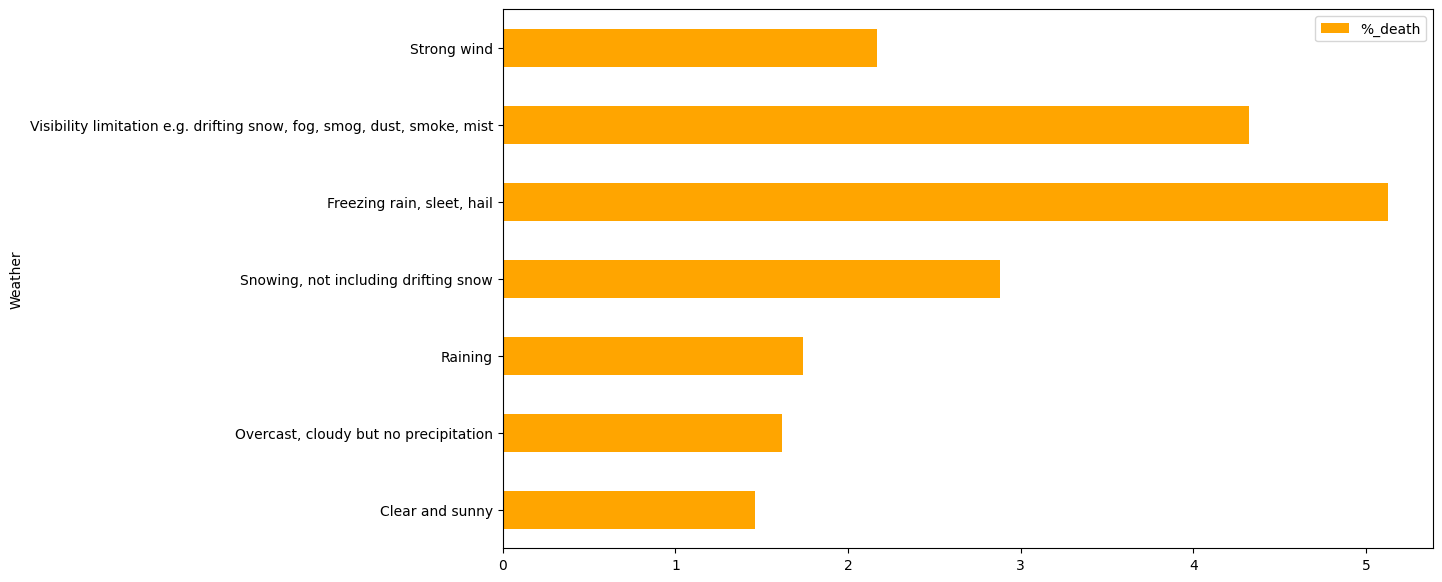

In [ ]:
# Primero creamos un dataset a traves de un groupby de la condicion meteorologica y de la severidad de la colision con un count
SF=df2.groupby(["WTHRC","SEVC"]).size().reset_index(name="Count")



# Creamos un a funcion para saber el porcentaje de accidentes con al menos un fallecido segun la condicion meteorologica
percs=[]
condition_weather=[]
for i,pos in enumerate(SF["WTHRC"].unique()):
    unos=SF[SF["WTHRC"]==pos]["Count"].values.tolist()[0]
    doses=SF[SF["WTHRC"]==pos]["Count"].values.tolist()[1]
    percs.append(round(unos/(unos+doses)*100,2))
    condition_weather.append(pos)
    
    
dfcondition=pd.DataFrame({
    "%_death":percs,
    "Weather":condition_weather
})

maps={
1.0: "Clear and sunny",
2.0: "Overcast, cloudy but no precipitation",
3.0:"Raining",
4.0: "Snowing, not including drifting snow",
5.0:"Freezing rain, sleet, hail",
6.0:"Visibility limitation e.g. drifting snow, fog, smog, dust, smoke, mist",
7.0:"Strong wind" }
dfcondition["Weather"]=dfcondition["Weather"].map(maps)

### Visualizamos:
plt.rcParams.update(plt.rcParamsDefault)#esto para ajustar bien la imagen
dfcondition.set_index('Weather', inplace=True)
dfcondition.plot(kind='barh', figsize=(12, 7), color=['Orange','cyan']) 
plt.show()

Se aprecia que las condiciones meteorologicas mas adversas se relacionan con un mayor porcentaje de accidentes con al menos un fallecido. Sobre todo la condicion de lluvia helada, aguanieve, granizo es la que presenta un mayor numero de accidentes con al menos un fallecido (mas de un 5% de los registros).





> 1.1.1 ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son más propensos a tener accidentes (acción correctiva en prima)?



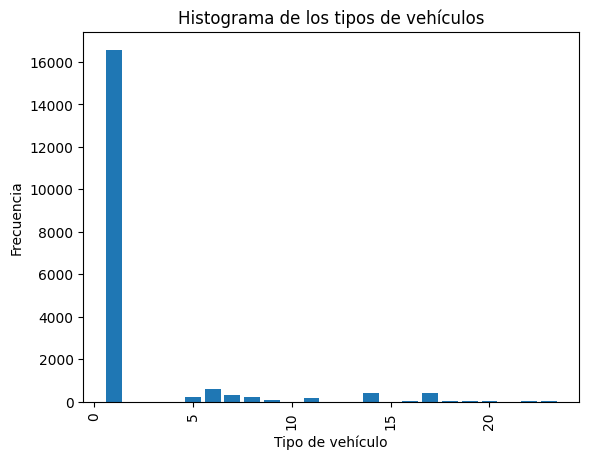

In [ ]:
# Según el tipo de vehículo
frecuencias = df2['TYPEV'].value_counts()

# Crear el histograma
plt.bar(frecuencias.index, frecuencias.values)

# Personalizar el gráfico
plt.xlabel('Tipo de vehículo')
plt.ylabel('Frecuencia')
plt.title('Histograma de los tipos de vehículos')

# Mostrar todas las etiquetas en el eje x
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

In [ ]:
frecuencias = df2['TYPEV'].value_counts().reset_index()

# Renombrar las columnas del DataFrame de frecuencias
frecuencias.columns = ['Tipo de vehículo', 'Frecuencia']

# Mostrar las frecuencias en formato de tabla
print(frecuencias)

    Tipo de vehículo  Frecuencia
0                1.0       16569
1                6.0         599
2               17.0         426
3               14.0         410
4                7.0         292
5                8.0         222
6                5.0         209
7               11.0         177
8                9.0          70
9               16.0          34
10              20.0          20
11              18.0          17
12              23.0          15
13              22.0          14
14              19.0           7
15              10.0           3
16              21.0           2


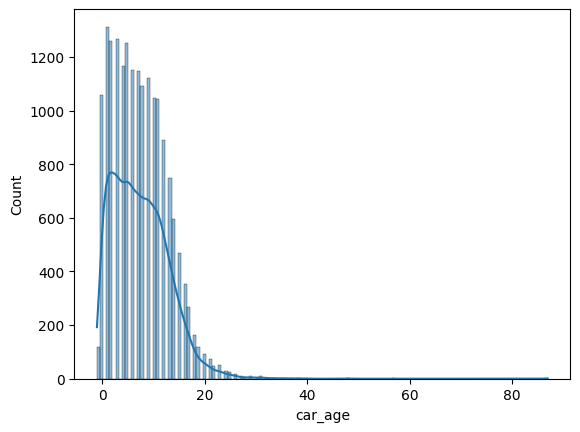

In [ ]:
# Según la antigüedad:

# Construimos la variable de la antigüedad como la diferencia entre el año del modelo del vehículo y el año en que se 
# produjo el accidente
df2["car_age"]=df2["YEARC"]-df2["YEARV"]
# Visualizamos:
sns.histplot(data=df2, x="car_age", kde=True)
plt.show()

In [ ]:
frecuencias = df2['car_age'].value_counts().reset_index()

# Renombrar las columnas del DataFrame de frecuencias
frecuencias.columns = ['Antigüedad', 'Frecuencia']

# Mostrar las frecuencias en formato de tabla
print(frecuencias)

    Antigüedad  Frecuencia
0          1.0        1313
1          3.0        1266
2          2.0        1259
3          5.0        1253
4          4.0        1166
5          6.0        1151
6          7.0        1147
7          9.0        1123
8          8.0        1092
9          0.0        1060
10        10.0        1047
11        11.0        1042
12        12.0         889
13        13.0         748
14        14.0         594
15        15.0         470
16        16.0         353
17        17.0         266
18        18.0         162
19        19.0         117
20        -1.0         117
21        20.0          93
22        21.0          74
23        23.0          50
24        22.0          46
25        24.0          28
26        25.0          26
27        26.0          18
28        29.0          11
29        27.0           9
30        31.0           9
31        28.0           6
32        30.0           4
33        32.0           4
34        34.0           3
35        48.0           2
3

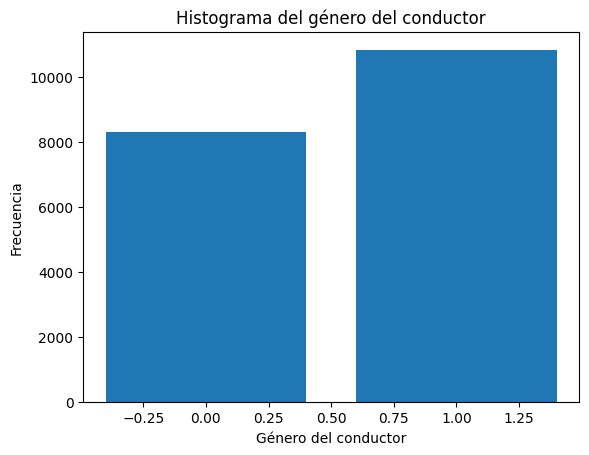

In [ ]:
# A nivel persona (sexo):

frecuencias = df2['SEXP'].value_counts()

# Crear el histograma
plt.bar(frecuencias.index, frecuencias.values)

# Personalizar el gráfico
plt.xlabel('Género del conductor')
plt.ylabel('Frecuencia')
plt.title('Histograma del género del conductor')


# Mostrar el gráfico
plt.show()

In [ ]:
frecuencias = df2['SEXP'].value_counts().reset_index()

# Renombrar las columnas del DataFrame de frecuencias
frecuencias.columns = ['Sexo', 'Frecuencia']

# Mostrar las frecuencias en formato de tabla
print(frecuencias)

   Sexo  Frecuencia
0   1.0       10841
1   0.0        8301


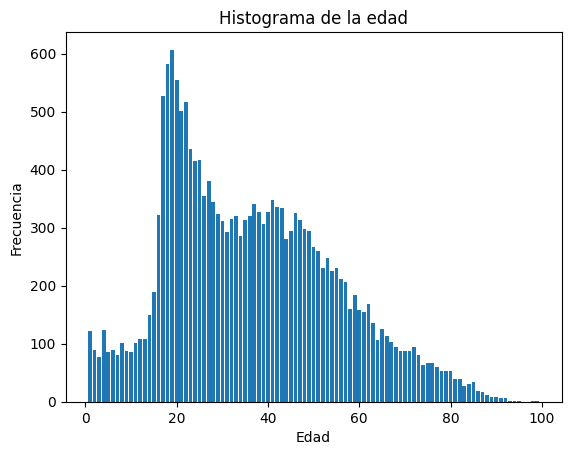

In [ ]:
# A nivel persona (edad de la persona):

frecuencias = df2['AGEP'].value_counts()

# Crear el histograma
plt.bar(frecuencias.index, frecuencias.values)

# Personalizar el gráfico
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de la edad')


# Mostrar el gráfico
plt.show()

In [ ]:
frecuencias = df2['AGEP'].value_counts().reset_index()

# Renombrar las columnas del DataFrame de frecuencias
frecuencias.columns = ['Edad', 'Frecuencia']

# Mostrar las frecuencias en formato de tabla
print(frecuencias)

    Edad  Frecuencia
0   19.0         607
1   18.0         583
2   20.0         554
3   17.0         527
4   22.0         516
5   21.0         501
6   23.0         436
7   25.0         417
8   24.0         415
9   27.0         381
10  26.0         355
11  41.0         348
12  28.0         345
13  37.0         341
14  42.0         335
15  43.0         334
16  38.0         328
17  40.0         327
18  46.0         325
19  29.0         324
20  16.0         322
21  33.0         321
22  36.0         320
23  32.0         315
24  47.0         313
25  35.0         313
26  30.0         311
27  39.0         306
28  48.0         298
29  49.0         295
30  45.0         294
31  31.0         292
32  34.0         285
33  44.0         280
34  50.0         267
35  51.0         260
36  53.0         248
37  55.0         230
38  52.0         230
39  54.0         226
40  56.0         211
41  57.0         206
42  15.0         189
43  59.0         184
44  62.0         169
45  58.0         160
46  60.0     

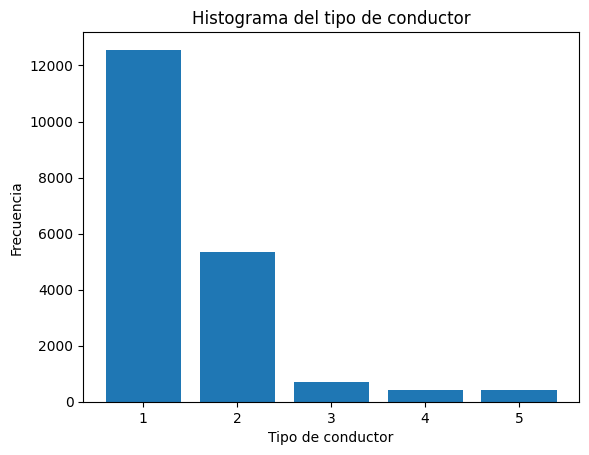

In [ ]:
# A nivel persona (segun el tipo de conductor):

frecuencias = df2['USERP'].value_counts()

# Crear el histograma
plt.bar(frecuencias.index, frecuencias.values)

# Personalizar el gráfico
plt.xlabel('Tipo de conductor')
plt.ylabel('Frecuencia')
plt.title('Histograma del tipo de conductor')


# Mostrar el gráfico
plt.show()

In [ ]:
frecuencias = df2['USERP'].value_counts().reset_index()

# Renombrar las columnas del DataFrame de frecuencias
frecuencias.columns = ['Tipo de conductor', 'Frecuencia']

# Mostrar las frecuencias en formato de tabla
print(frecuencias)

   Tipo de conductor  Frecuencia
0                1.0       12562
1                2.0        5341
2                3.0         693
3                4.0         426
4                5.0         410


Los tipos de vehículos que más accidentes sufren son, con muchísima diferencia son los Vehículos ligeros (automóviles de pasajeros, camionetas de pasajeros, vehículos utilitarios livianos y
camionetas pick-up livianas). Estos son los que merecerían una acción correctiva en la prima. Los siguientes tipos de vehículos más propensos a sufrir accidentes son camiones y furgonetas de mayor o igual masa que 4536 KG, pero están muy alejados de los primeros. Vemos que la mayoria de accidentes se produjeron con vehiculos cuya antigüedad está comprendida entre 1 y 15 años aprox. No parece ser influyente con respecto a la probabilidad de sufrir un accidente: se esperaría que una mayor antigüedad del vehiculo aumentara el riesgo de sufrir un acciedente, es decir, la distribucion deberia presentar una asimetría negativa, pero como vemos en este caso es mas bien positiva. En cuanto a los conductores, los más propensos a sufrir accidentes son los hombres y cuanto más joven, más probabilidad hay de sufrir accidente (como es de esperar, conductores noveles tienen una tasa de accidentes mayor). Por último, los conductores de vehículos a motor son los que más accidentes sufren también



> ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son menos propensos a tener accidentes (descuento en prima)?



Los menos propensos a sufrir accidentes, teniendo en cuenta el tipo de vehículo son los camiones de bomberos y los autobusess escolares pequeños. Con al tipo de conductor, los que menos accidentes sufren son las mujeres y cuanto más adulta sea la persona, menor es la probabilidad. También, los conductores de motocicletas y/o bicicletas son menos propensas a sufrir accidentes. 

#### **1.2 Tratamiento de variables categoricas: encoding**

En este subapartado ahondaremos más (y de mejor manera) en el preprocesamiento adecuado de las variables categóricas, que como hemos visto antes son la mayoría. Las convertiremos a numéricas aplicando distintos métodos de encoding: para aquellas variables que no tengan un número muy elevado de categorías, aplicaremos la técnica OneHotEncoding y para aquellas con un número relativamente alto de categorías emplearemos Target Encoding. Estableceremos el umbral en 8 categorías. Antes de comenzar con este tratamiento, es importante identificar qué variables contienen información meramente numérica de manera subyacente y cuáles no: por ejemplo, el caso de la variable P_AGE es una variable numérica (aunque esté tratada como object porque contiene valores alfabéticos para datos omitidos o faltantes) ya que indica la edad de la persona. En estos casos, podemos optar por sustituir los valores no numéricos por datos NaN 

Variables que son de tipo object pero en realidad son numéricas: C_VEHS, V_YEAR, P_AGE

In [ ]:
# Transformarmos las variables categóricas que son numéricas en el fondo a float:
df['C_VEHS'] = df['C_VEHS'].replace(['XX', 'UU'], float('nan'))
df['C_VEHS'] = df['C_VEHS'].astype(float)

df['V_YEAR'] = df['V_YEAR'].replace(['NNNN','XXXX', 'UUUU'], float('nan'))
df['V_YEAR'] = df['V_YEAR'].astype(float)

df['P_AGE'] = df['P_AGE'].replace(['NN','XX'], float('nan'))
df['P_AGE'] = df['P_AGE'].replace(['UU'], float('nan'))
df['P_AGE'] = df['P_AGE'].astype(float)

In [ ]:
# Para el resto de variables categóricas, creamos una función para saber el numero de categorias de cada una de ellas.
#  Así, podremos deducir qué metodo llevar a cabo para realizar las transformaciones adecuadas

def count_unique_categories(dataframe):
    non_numeric_cols = dataframe.select_dtypes(include=['object']).columns.tolist()
    unique_categories = {}
    for col in non_numeric_cols:
        unique_categories[col] = len(dataframe[col].unique())
    return unique_categories

unique_categories = count_unique_categories(df)
print(unique_categories)

{'C_MNTH': 15, 'C_WDAY': 8, 'C_HOUR': 25, 'C_CONF': 20, 'C_RCFG': 11, 'C_WTHR': 9, 'C_RSUR': 11, 'C_RALN': 8, 'C_TRAF': 19, 'V_ID': 30, 'V_TYPE': 20, 'P_ID': 27, 'P_SEX': 4, 'P_PSN': 15, 'P_ISEV': 5, 'P_SAFE': 8, 'P_USER': 6}


Como se puede observar, hay algunas variables que tienen bastantes categorías (especialmente las variables C_HOUR, C_CONF, V_TYPE, etc.), las cuales trateremos con el método Target Encoding. Para el resto, como el numero de categorías es relativamente pequeño (menor o igual que 6), podemos emplear el metodo One Hot Encoding

*Nota: para aplicar el método de Target Encoding se ha considerado como variable objetivo la variable 'C_SEV', que indica la existencia de fallecidos en el accidente o no y la cual se va a tratar en los ejercicios posteriores como variable objetivo para aplicar un algoritmo supervisado que prediga si habrá fallecimientos o no*

In [ ]:
# Transformación de variables categóricas: método de Target Encoding para las variablescon más de 6 categorías, 
# One Hot encoding para el resto de las variables

# Target Encoding:

te = ce.TargetEncoder(cols=['C_MNTH'])
df['C_MNTH'] = te.fit_transform(df['C_MNTH'],df.C_SEV)

te = ce.TargetEncoder(cols=['C_HOUR'])
df['C_HOUR'] = te.fit_transform(df['C_HOUR'],df.C_SEV)

te = ce.TargetEncoder(cols=['C_CONF'])
df['C_CONF'] = te.fit_transform(df['C_CONF'],df.C_SEV)

te = ce.TargetEncoder(cols=['C_RCFG'])
df['C_RCFG'] = te.fit_transform(df['C_RCFG'],df.C_SEV)

te = ce.TargetEncoder(cols=['C_WTHR'])
df['C_WTHR'] = te.fit_transform(df['C_WTHR'],df.C_SEV)

te = ce.TargetEncoder(cols=['C_RSUR'])
df['C_RSUR'] = te.fit_transform(df['C_RSUR'],df.C_SEV)

te = ce.TargetEncoder(cols=['C_TRAF'])
df['C_TRAF'] = te.fit_transform(df['C_TRAF'],df.C_SEV)

te = ce.TargetEncoder(cols=['V_ID'])
df['V_ID'] = te.fit_transform(df['V_ID'],df.C_SEV)

te = ce.TargetEncoder(cols=['V_TYPE'])
df['V_TYPE'] = te.fit_transform(df['V_TYPE'],df.C_SEV)

te = ce.TargetEncoder(cols=['P_ID'])
df['P_ID'] = te.fit_transform(df['P_ID'],df.C_SEV)

te = ce.TargetEncoder(cols=['P_PSN'])
df['P_PSN'] = te.fit_transform(df['P_PSN'],df.C_SEV)

In [ ]:
# One Hot Encoding resto de las variables categóricas:

list_columns_cat = list(df.select_dtypes("object", "category").columns)

ohe = ce.OneHotEncoder(cols=list_columns_cat)
model = ohe.fit(df)

df = model.transform(df)

df.dtypes.to_dict()

{'C_YEAR': dtype('int64'),
 'C_MNTH': dtype('float64'),
 'C_WDAY_1': dtype('int64'),
 'C_WDAY_2': dtype('int64'),
 'C_WDAY_3': dtype('int64'),
 'C_WDAY_4': dtype('int64'),
 'C_WDAY_5': dtype('int64'),
 'C_WDAY_6': dtype('int64'),
 'C_WDAY_7': dtype('int64'),
 'C_WDAY_8': dtype('int64'),
 'C_HOUR': dtype('float64'),
 'C_SEV': dtype('int64'),
 'C_VEHS': dtype('float64'),
 'C_CONF': dtype('float64'),
 'C_RCFG': dtype('float64'),
 'C_WTHR': dtype('float64'),
 'C_RSUR': dtype('float64'),
 'C_RALN_1': dtype('int64'),
 'C_RALN_2': dtype('int64'),
 'C_RALN_3': dtype('int64'),
 'C_RALN_4': dtype('int64'),
 'C_RALN_5': dtype('int64'),
 'C_RALN_6': dtype('int64'),
 'C_RALN_7': dtype('int64'),
 'C_RALN_8': dtype('int64'),
 'C_TRAF': dtype('float64'),
 'V_ID': dtype('float64'),
 'V_TYPE': dtype('float64'),
 'V_YEAR': dtype('float64'),
 'P_ID': dtype('float64'),
 'P_SEX_1': dtype('int64'),
 'P_SEX_2': dtype('int64'),
 'P_SEX_3': dtype('int64'),
 'P_SEX_4': dtype('int64'),
 'P_AGE': dtype('float64'),

Como vemos, ya tenemos todas las variables transformadas a numéricas y ya se podrán emplear los algoritmos no supervisados como el PCA para continuar con el análisis exploratorio, aunque antes es necesario realizar algún tratamiento más, como el de los NAs

#### **1.3 Tratamiento de missings, correlaciones y outliers**

In [ ]:
# CANTIDAD DE VALORES NULOS

def missing_summary(dataframe):
    num_elementos = df.count()
    num_missing = df.isna().sum()
    missing_summary = pd.DataFrame(index=num_elementos.index, 
                               data={'total':num_elementos, 
                                     'missing':num_missing,
                                     'missing_rate (%)': round(num_missing/num_elementos * 100, 2)})
    return missing_summary
missing_summary(df)

,total,missing,missing_rate (%)
C_YEAR,20000,0,0.00
C_MNTH,20000,0,0.00
C_WDAY_1,20000,0,0.00
C_WDAY_2,20000,0,0.00
C_WDAY_3,20000,0,0.00
C_WDAY_4,20000,0,0.00
C_WDAY_5,20000,0,0.00
C_WDAY_6,20000,0,0.00
C_WDAY_7,20000,0,0.00
C_WDAY_8,20000,0,0.00


La únicas dos variables con presencia de datos nulos son las variables P_AGE, V_YEAR y C_VEHS, las cuales hemos tratado antes como numéricas al hacer la transformación correspondiente. Para tratar estos valores, al ser todas estas variables de tipo discreto, podemos sustituir los valores nulos por la moda

In [ ]:
# Usamos un bucle for para cambiar los valores nulos por la moda
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True) # Para las discretas, sustituimos los valores missing por la moda de la variable

CORRELACIONES

Antes de emprezar con cualquier modelo que vayamos a hacer de ML es importante ver cómo de relacionadas están nuestras variables. Esto es importante dado que si dos de las variables está relacionadas deberemos excluir una de ellas para evitar alta colinealidad

<Axes: >

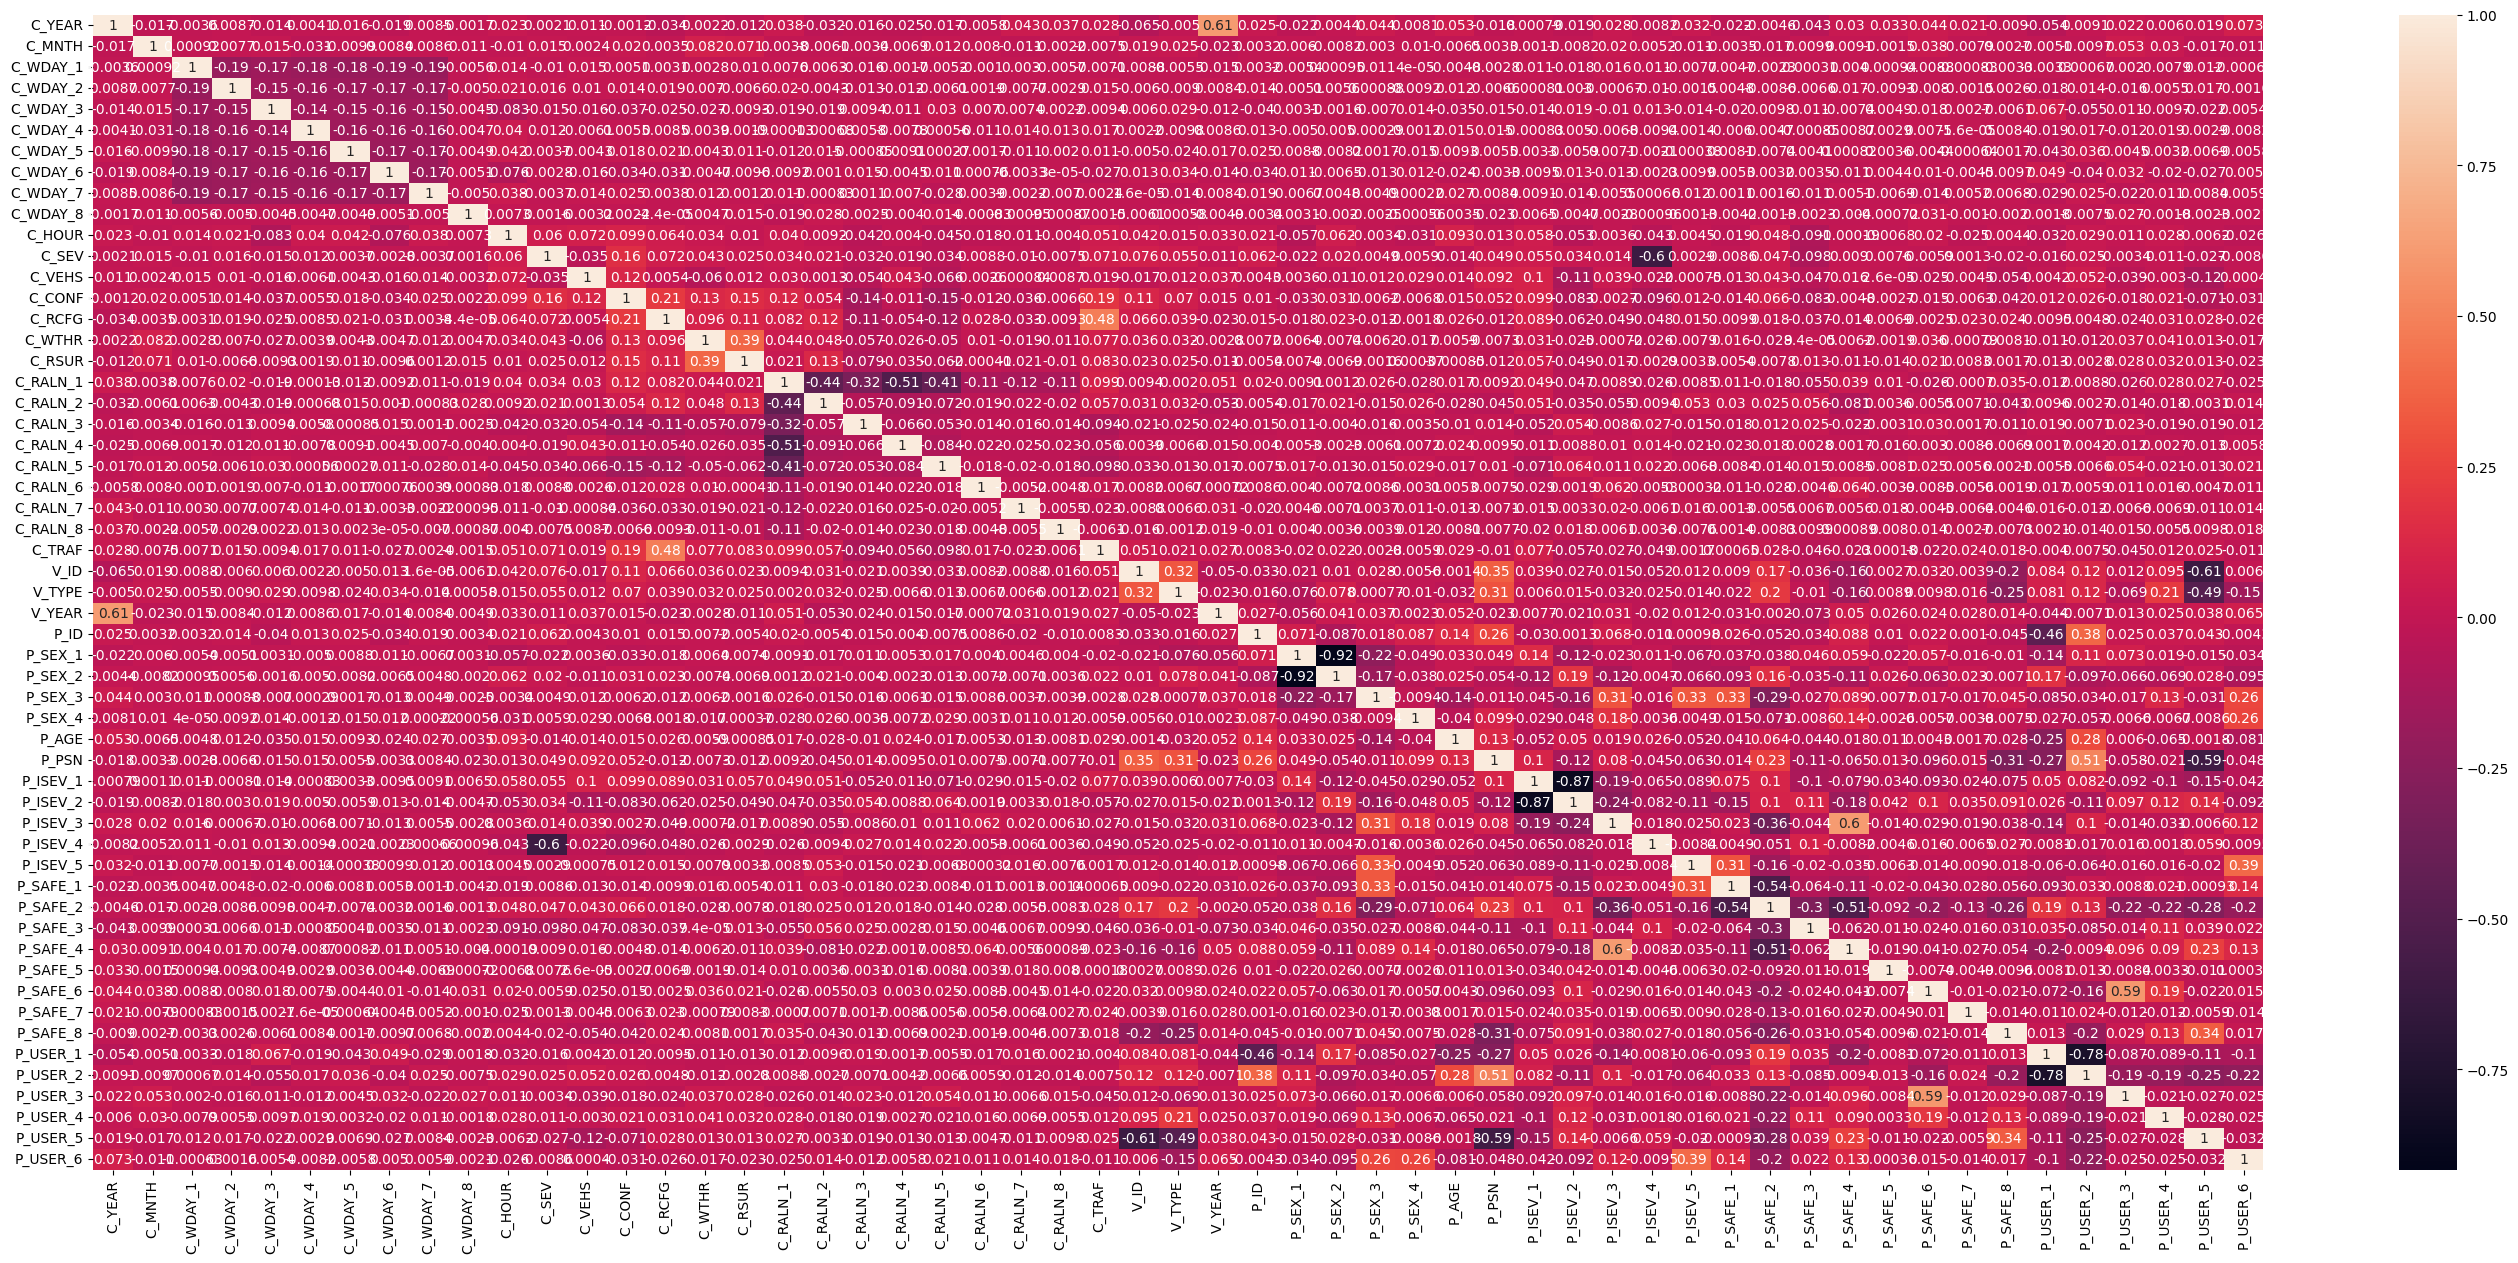

In [ ]:
fig, ax = plt.subplots(figsize=(35, 15))
sns.heatmap(df.corr(), annot=True, ax=ax)

El grado de relación entre las variables es relativamente bajo, aunque destacan las relaciones inversas que existen entre las variables P_SEX_1 y P_SEX_2, P_ISEV_1 y P_ISEV_2, P_USER_1 y P_USER_2, V_ID y P_USER_3

Se ha decidido en esta primera iteración, no eliminar correlaciones. Sin embargo, si finalmente se aplica algún algoritmo que lo requiera, se que eliminarán correlaciones

OUTLIERS

Para identificar outliers en una columna específica de un DataFrame, utilizaremos el método del rango intercuartílico (IQR).

In [ ]:
Q1 = df['C_YEAR'].quantile(0.25)
Q3 = df['C_YEAR'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - (1.5 * IQR)
limite_superior = Q3 + (1.5 * IQR)

outliers = df[(df['C_YEAR'] < limite_inferior) | (df['C_YEAR'] > limite_superior)]
outliers #Observamos que no hay outliers

# solo lo hacemos en las columnas que tenga sentido hacerlo, por ejemplo, C_VEHS

,C_YEAR,C_MNTH,C_WDAY_1,C_WDAY_2,C_WDAY_3,C_WDAY_4,C_WDAY_5,C_WDAY_6,C_WDAY_7,C_WDAY_8,...,P_SAFE_5,P_SAFE_6,P_SAFE_7,P_SAFE_8,P_USER_1,P_USER_2,P_USER_3,P_USER_4,P_USER_5,P_USER_6


In [ ]:
Q1 = df['C_VEHS'].quantile(0.25)
Q3 = df['C_VEHS'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - (1.5 * IQR)
limite_superior = Q3 + (1.5 * IQR)

outliers = df[(df['C_VEHS'] < limite_inferior) | (df['C_VEHS'] > limite_superior)]
outliers

# En este caso, hay 7.700 filas que son outliers, ¿tiene sentido que haya 57 coches envueltos en un solo accidente? En nuestro caso, pensamos que no tiene mucho sentido por lo que vamos a optar por todos los numeros mayores que 10
# Utilizamos 15 porque el limite superior, 2, no parece un poco bajo para cambiar todos los accidentes que estén por encima.


df.loc[df['C_VEHS'] > 15, 'C_VEHS'] = df['C_VEHS'].mean()

In [ ]:
# la columna V_ID también podemos mejorar los outliers, una alta colinealidad perjudicará nuestro modelo.
Q1 = df['V_ID'].quantile(0.25)
Q3 = df['V_ID'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - (1.5 * IQR)
limite_superior = Q3 + (1.5 * IQR)

outliers = df[(df['V_ID'] < limite_inferior) | (df['V_ID'] > limite_superior)]
outliers  #1.026 FILAS

# como el limite superior es 3.5 cambiamos todo lo que esté por 4 por la media
df.loc[df['V_ID'] > 4, 'V_ID'] = df['V_ID'].mean()

In [ ]:
# columna P_ID
Q1 = df['P_ID'].quantile(0.25)
Q3 = df['P_ID'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - (1.5 * IQR)
limite_superior = Q3 + (1.5 * IQR)

outliers = df[(df['P_ID'] < limite_inferior) | (df['P_ID'] > limite_superior)]
outliers #1955 filas


# como el limite superior es 3.5 cambiamos todo lo que esté por 4 por la media
df.loc[df['P_ID'] > limite_superior, 'P_ID'] = df['P_ID'].mean()

#### **1.4 Aplicación de técnicas no supervisadas: PCA y autoencoder**

1.4.1 PCA

In [ ]:
df.head()

,C_YEAR,C_MNTH,C_WDAY_1,C_WDAY_2,C_WDAY_3,C_WDAY_4,C_WDAY_5,C_WDAY_6,C_WDAY_7,C_WDAY_8,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN_1,C_RALN_2,C_RALN_3,C_RALN_4,C_RALN_5,C_RALN_6,C_RALN_7,C_RALN_8,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX_1,P_SEX_2,P_SEX_3,P_SEX_4,P_AGE,P_PSN,P_ISEV_1,P_ISEV_2,P_ISEV_3,P_ISEV_4,P_ISEV_5,P_SAFE_1,P_SAFE_2,P_SAFE_3,P_SAFE_4,P_SAFE_5,P_SAFE_6,P_SAFE_7,P_SAFE_8,P_USER_1,P_USER_2,P_USER_3,P_USER_4,P_USER_5,P_USER_6
0,2001,1.982230,1,0,0,0,0,0,0,0,1.987439,2,2.0,1.992512,1.990832,1.985429,1.984263,1,0,0,0,0,0,0,0,1.976587,1.982938,1.985575,1986.0,1.980804,1,0,0,0,15.0,1.983107,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2008,1.985440,0,1,0,0,0,0,0,0,1.987768,2,2.0,1.995017,1.990832,1.985429,1.984263,1,0,0,0,0,0,0,0,1.976587,1.989469,1.976077,2002.0,1.980804,1,0,0,0,4.0,1.977974,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,2009,1.982172,0,0,1,0,0,0,0,0,1.975228,2,2.0,1.994212,1.990832,1.985429,1.984263,1,0,0,0,0,0,0,0,1.976587,1.987906,1.985575,2004.0,1.980804,0,1,0,0,17.0,1.988652,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,2003,1.983643,1,0,0,0,0,0,0,0,1.987572,2,2.0,1.985965,1.988711,1.985714,1.986957,0,1,0,0,0,0,0,0,1.984375,1.987906,1.985575,1996.0,1.986854,0,1,0,0,2.0,1.988652,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,2014,1.982986,0,0,0,1,0,0,0,0,1.981455,2,3.0,1.995017,1.972961,1.985429,1.984263,1,0,0,0,0,0,0,0,1.993966,1.987906,1.985575,2001.0,1.985187,0,1,0,0,36.0,1.985900,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Comenzamos normalizando los datos mediante el sklearn

# Lo hacemos en dos pasos. 
# Con el primer paso calculamos los parámetros mean and std que quedarán embbebidos en el objeto scaler:
scaler = StandardScaler()
train_scaler = scaler.fit(df)

# Y después normalizamos el conjunto de datos que queramos con dichos parámetros. Es necesario crear un dataframe 
# nuevo ya que estos métodos
# devuelven un array numpy
df_norm = pd.DataFrame(columns=[df.columns], data=train_scaler.transform(df))
df_norm

In [ ]:
from sklearn.model_selection import train_test_split
# Comenzamos haciendo un PCA (método lineal)
# Dividimos el conjunto de datos en un 86% entrenamiento y un 14% de test:
df_test, df_train = train_test_split(df_norm, test_size=1/7.0, random_state=1000)
print("Train dataset:", df_train.shape)
print("Test dataset:", df_test.shape)
# Nota: hemos aplicado los metodos de reduccion dimensional sobre el conjunto de datos de entrenamiento (df_train)

Train dataset: (2858, 55)
Test dataset: (17142, 55)


In [ ]:
from sklearn.decomposition import PCA, FactorAnalysis, KernelPCA
# Vamos a ver el numero de componentes que hacen falta para explicar el 95% de la varianza
pca = PCA() 
pca.fit(df_train)

var_threshold = 0.95
var_explained = np.cumsum(pca.explained_variance_ratio_)
num_comp = np.where(np.logical_not(var_explained<var_threshold))[0][0] + 1
print('%d componentes explican el %2.f%% de la varianza' %(num_comp, 100*var_threshold))

41 componentes explican el 95% de la varianza


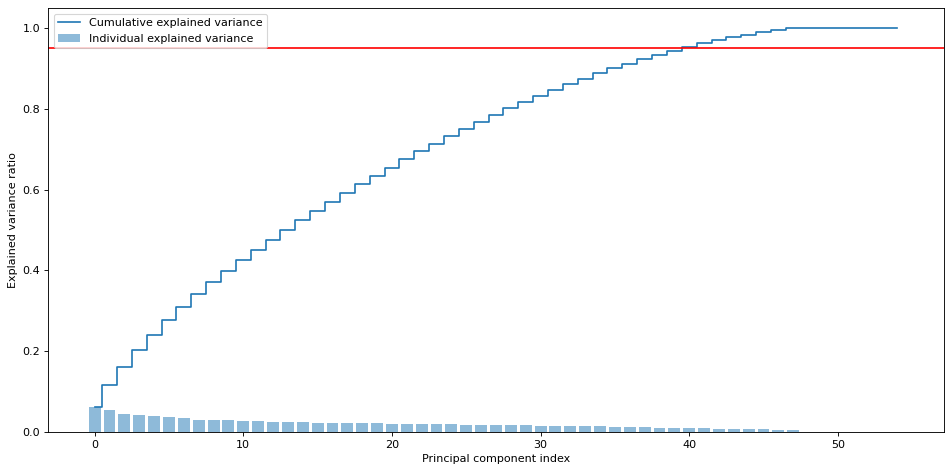

In [ ]:
# Observamos cómo varía la varianza en funcion de los componentes utilizados
X_train_pca = pca.transform(df_train)
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

threshold = 0.95
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.axhline(y=threshold, color='r', linestyle='-')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Observamos como, a medida que aumenta el numero de componentes, el aumento de la varianza explicada es cada vez menor

0.9536880032363727


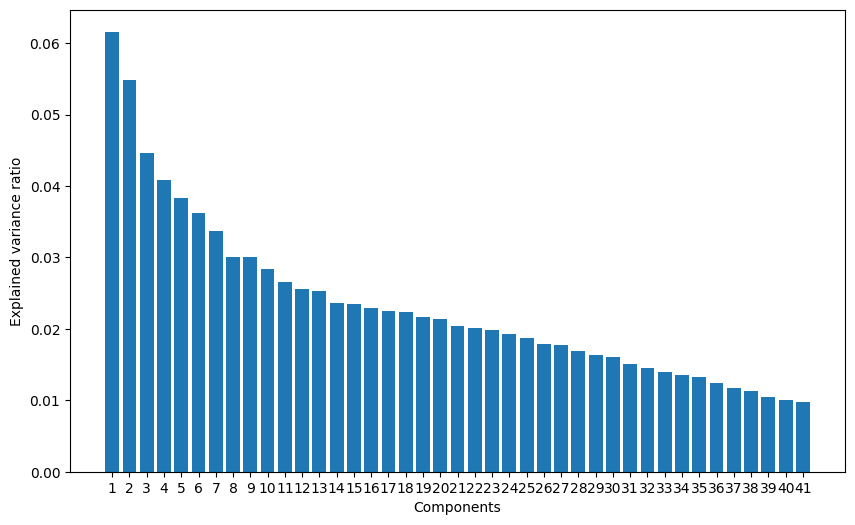

In [ ]:
# Escogemos las 41 primeras componentes (que explican el 95% de la varianza)
pca = PCA(n_components=41, random_state=1000)
df_pca = pca.fit_transform(df_train)

# Varianza total explicada (como un ratio)
print(np.sum(pca.explained_variance_ratio_))

# Muestra el ratio de varianza explicada por componente
ev = pca.explained_variance_ratio_

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(np.arange(1, len(ev) + 1, 1), ev)
ax.set_xticks(np.arange(1, len(ev) + 1, 1))
ax.set_xlabel('Components')
ax.set_ylabel('Explained variance ratio')

plt.show()

Vemos que para explicar el 95% de la varianza hace falta escoger 19 componentes mediante el PCA (casi el mismo numero de variables que hay en el dataset)

1.4.2 AUTOENCODER

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, Normalizer, MinMaxScaler
# Por ultimo, vamos a emplear el metodo de AUTOENCODER


pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', MinMaxScaler())])

# Ajustamos la escala solo a los datos de entrenamiento.
pipeline.fit(df_train)

# Escalamos entrenamiento y test con los ajustes obtenidos solo de entrenamiento
# los resultados obtenidos son arrays numpy. no dataframes.
train_data_scaled = pipeline.transform(df_train)
test_data_scaled = pipeline.transform(df_test)


In [ ]:
import tensorflow as tf
# Dimensiones // Hyperparámetros 
input_dim = train_data_scaled.shape[1]
BATCH_SIZE = 256
EPOCHS = 100



inputs = tf.keras.Input(shape=(input_dim))

x = tf.keras.layers.Dense(16, activation='elu')(inputs)
x = tf.keras.layers.Dense(8, activation='elu')(x)
x = tf.keras.layers.Dense(4, activation='elu')(x)
x = tf.keras.layers.Dense(2, activation='elu')(x)
x = tf.keras.layers.Dense(4, activation='elu')(x)
x = tf.keras.layers.Dense(8, activation='elu')(x)
x = tf.keras.layers.Dense(16, activation='elu')(x)
outputs = tf.keras.layers.Dense(input_dim, activation='elu')(x)

autoencoder = tf.keras.Model(inputs=inputs, outputs=outputs)


autoencoder.compile(optimizer="adam", 
                    loss="mse")

autoencoder.summary();

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 55)]              0         
                                                                 
 dense (Dense)               (None, 16)                896       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 8)                 40    

In [ ]:
autoencoder.fit(
    train_data_scaled, train_data_scaled,
    shuffle=True,
    epochs=60,
    batch_size=100
)

Epoch 1/60
29/29 [==============================] - 3s 7ms/step - loss: 0.1963
Epoch 2/60
29/29 [==============================] - 0s 10ms/step - loss: 0.1116
Epoch 3/60
29/29 [==============================] - 0s 8ms/step - loss: 0.0554
Epoch 4/60
29/29 [==============================] - 0s 7ms/step - loss: 0.0400
Epoch 5/60
29/29 [==============================] - 0s 7ms/step - loss: 0.0382
Epoch 6/60
29/29 [==============================] - 0s 7ms/step - loss: 0.0381
Epoch 7/60
29/29 [==============================] - 0s 9ms/step - loss: 0.0380
Epoch 8/60
29/29 [==============================] - 0s 7ms/step - loss: 0.0380
Epoch 9/60
29/29 [==============================] - 0s 5ms/step - loss: 0.0379
Epoch 10/60
29/29 [==============================] - 0s 7ms/step - loss: 0.0379
Epoch 11/60
29/29 [==============================] - 0s 7ms/step - loss: 0.0378
Epoch 12/60
29/29 [==============================] - 0s 5ms/step - loss: 0.0377
Epoch 13/60
29/29 [=============================

El error que vamos cometiendo al hacer la reduccion y luego la reconstruccion es razonable

In [ ]:
# Errores con datos de train
scaler = StandardScaler()
scaler.fit(df_train)
train_data_norm = scaler.transform(df_train)
test_data_norm = scaler.transform(df_test)
recovery_x = pca.inverse_transform(df_pca)
rest_pca = (train_data_norm - recovery_x)**2
score_pca = np.sum(rest_pca,1)
reconstructions = autoencoder.predict(train_data_scaled)
rest_x = (train_data_scaled - reconstructions)**2
score_autoencoder = np.sum(rest_x,1)
total_x_variance_autoencoder =  np.mean(np.sum(train_data_scaled**2,1))
total_x_variance_pca = np.mean(np.sum(train_data_norm**2,1))
total_error_pca = np.mean(score_pca)/total_x_variance_pca
total_error_autoencoder = np.mean(score_autoencoder)/total_x_variance_autoencoder
print("Errores con datos de entrenamiento:")
print(f"Error total PCA: {total_error_pca}")
print(f"Error total Autoencoder: {total_error_autoencoder}")

90/90 [==============================] - 0s 1ms/step
Errores con datos de entrenamiento:
Error total PCA: 0.05615769104529018
Error total Autoencoder: 0.12368336121410933


El error del autoencoder con los datos de entrenamiento es mayor que el que se comete al aplicar el PCA

In [ ]:
# Errores con datos de test
reconstructions = autoencoder.predict(test_data_scaled)
rest_x = (test_data_scaled - reconstructions)**2
score_autoencoder_test = np.sum(rest_x,1)

test_pca = pca.transform(test_data_norm)
recovery_x = pca.inverse_transform(test_pca)
rest_pca = (test_data_norm - recovery_x)**2
score_pca_test = np.sum(rest_pca,1)


total_x_variance_autoencoder =  np.mean(np.sum(test_data_scaled**2,1))
total_x_variance_pca = np.mean(np.sum(test_data_norm**2,1))
total_error_pca = np.mean(score_pca_test)/total_x_variance_pca
total_error_autoencoder = np.mean(score_autoencoder_test)/total_x_variance_autoencoder

print("Errores con datos de test:")
print(f"Error total PCA: {total_error_pca}")
print(f"Error total Autoencoder: {total_error_autoencoder}")

536/536 [==============================] - 2s 3ms/step
Errores con datos de test:
Error total PCA: 0.07977837865802506
Error total Autoencoder: 0.6773005585221286


El error del autoencoder con los datos de test sigue siendo bastante mayor que el que se comete al aplicar el PCA

## **2. ¿Qué es lo que más contribuye a que existan fallecimientos en un accidente?**

Para realizar este ejercicio vamos a emplear un algoritmo supervisado de predicción de fallecimientos (para ello, la variable objetivo será la C_SEV, que indica si la colisión tuvo o no al menos un fallecido), y luego utilizaremos distintas métricas de evaluación para ver la idoneidad del algoritmo empleado. También mostraremos la importancia relativa de las variables en un modelo aplicado.

Lo primero que realizaremos será un rápido análisis de la varibale objetivo para ver su distribución y ver también si está desbalanceada

In [ ]:
df['C_SEV'].value_counts()

2    19670
1      330
Name: C_SEV, dtype: int64

Como vemos, la variabe está muy desbalanceada, por lo que debemos realizar una partición que conserve las proporciones originales en cada subconjunto. Para ello utilizaremos el parámetro "stratify" de la función "train_test_split" de scikit-learn que permite dividir los datos en subconjuntos de entrenamiento y prueba de tal manera que la proporción de la variable objetivo se mantenga en ambos subconjuntos

In [ ]:
from sklearn.model_selection import train_test_split

X_t_datos, X_t_datos_test, y_t_datos, y_t_datos_test = train_test_split(df.drop('C_SEV',axis=1), 
                                                                     df['C_SEV'], 
                                                                     stratify=df['C_SEV'], 
                                                                     test_size=0.2)
datos_train = pd.concat([X_t_datos, y_t_datos],axis=1)
datos_test = pd.concat([X_t_datos_test, y_t_datos_test],axis=1)
print('== Train\n', datos_train['C_SEV'].value_counts(normalize=True))
print('== Test\n', datos_test['C_SEV'].value_counts(normalize=True))

== Train
 2    0.9835
1    0.0165
Name: C_SEV, dtype: float64
== Test
 2    0.9835
1    0.0165
Name: C_SEV, dtype: float64


Una vez hemos tratado correctamente la variable objetivo, vamos a aplicar un algoritmo de Gradient Boost Classifier para ver cómo funciona al predecir si habrá fallecimientos o no, mostrando la importancia relativa de cada variable para identificar cuál es la variable más importante

GRADIENT BOOST CLASSIFIFER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# En el GradientBoost no es necesario escalar los datos

# Definimos el modelo GradientBoost
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

# Entrenamos el modelo con el conjunto de datos de entrenamiento
gbm.fit(X_t_datos, y_t_datos)


# Aplicamos el score en los datos de entrenamiento y vemos el accuracy en entrenamiento:

gbm.score(X_t_datos, y_t_datos)

0.9920625

Vemos que el score para los datos de entrenamiento es muy alto, lo que nos indica la idoneidad del modelo y la efectividad de aplicar este algoritmo para nuestro conjunto de datos particular

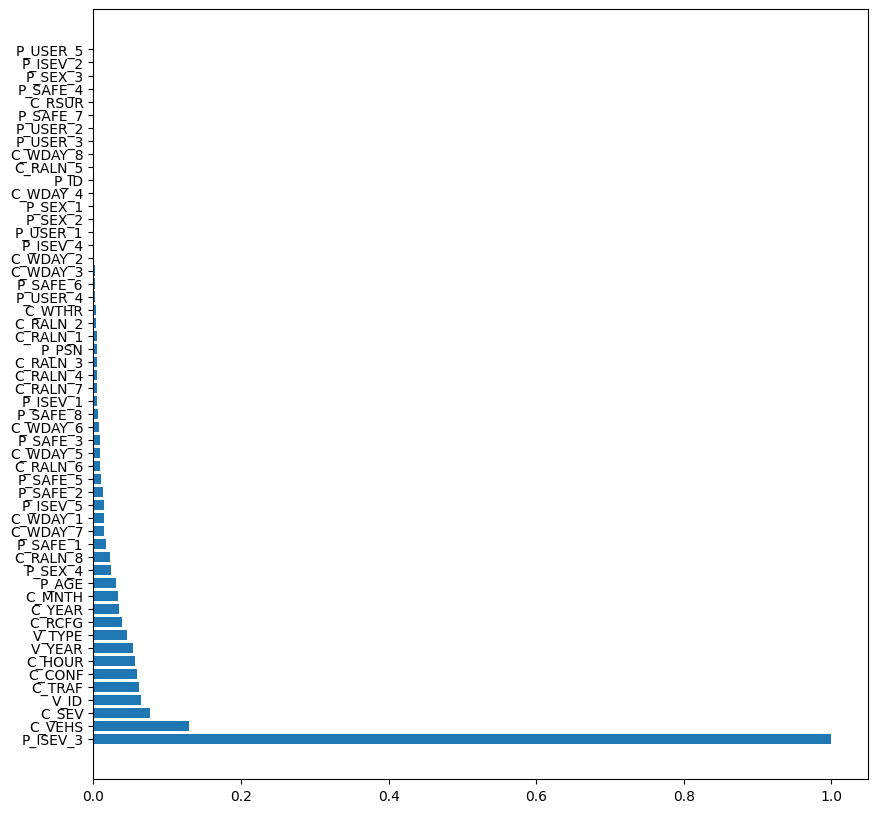

In [ ]:
features = df.columns

importances = gbm.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_t_datos.shape[1]),importances[indices])
plt.yticks(range(X_t_datos.shape[1]),features[indices])
plt.show()

La variable que más importancia tiene a la hora de clasificar correctamente la variable objetivo, y por tanto, a la hora de predecir si habrá fallecidos es la variable P_ISEV_3, que indica si la persona murió (toma el valor 1 porque es una variable dummy) o no (toma el valor 0) en el accidente. Otras variables importantes son las variables de V_YEAR (que indica el año del vehículo) y C_VEHS, que indica el número de vehículos implicados en el accidente

## **3. Dado un accidente, ¿se puede generar un modelo que prediga si habrá fallecimientos o no? ¿Si se va a necesitar tratamiento médico o no? Las aseguradoras tienen que inmovilizar capital para pagar estas casuísticas.**

De manera similar al anterior ejercicio, ahora vamos a emplear varios algoritmos para crear varios modelos según la variable objetivo sea C_SEV (si habrá fallecimientos o no) o P_ISEV_2 (cogemos esta variable dummy como objetivo para ver si la persona ha resultado herida y por tanto va a requerir tratamiento médico o no). Una vez hayan sido realizados los algoritmos, se evaluará para en cada uno de ellos las métricas más interesantes para los datos de test (accuracy, precision, recall, matriz de confusión, AUC y F-Score) y cómo de bueno es el modelo para los datos de train. Por último, escogeremos el mejor modelo en base a la efectividad de las métricas de evaluación. Para cada una de estas dos variables objetivo, vamos a llevar a cabo 3 algoritmos, para su posterior comparación y elección del mejor:


1.   Regresión logística
2.   Árbol de deicisión simple
3.   Bagging Classifier










#### **3.1.1 Regresión logística para predecir si hay fallecimientos o no (Variable objetivo C_SEV)**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

# Realizamos el escalado corrrespondiente para poder aplicar el algoritmo de Regrisión Logística

from sklearn.preprocessing import StandardScaler
logistic_scaler = StandardScaler()
logistic_scaler.fit(X_t_datos)

X_train_data_scaled = logistic_scaler.transform(X_t_datos)

In [ ]:
# Entrenamos el modelo

logistic_model.fit(X_t_datos, y_t_datos)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Aplicamos el score en los datos de entrenamiento y vemos el accuracy en entrenamiento:

logistic_model.score(X_train_data_scaled, y_t_datos)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6430625

In [ ]:
# Evaluamos el modelo con el conjunto de test:
# Escalamos antes los datos de test
X_test_data_scaled = logistic_scaler.transform(X_t_datos_test)

# Vamos a calcular algunas métricas de clasificación para test. Para ello, primero extraemos tanto las predicciones, como sus probabilidades

predictions_prob = logistic_model.predict_proba(X_test_data_scaled)[:,1]
predictions = logistic_model.predict(X_test_data_scaled)

results_lr_df = (datos_test
    .assign(predicted_prob=predictions_prob)
    .assign(predicted_flag=predictions)
    .loc[:,['C_SEV','predicted_prob','predicted_flag']]
)

results_lr_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,C_SEV,predicted_prob,predicted_flag
8514,2,0.987413,2
4605,2,0.027123,1
19014,2,0.909279,2
5028,2,0.307046,1
15795,2,0.387543,1


In [ ]:
# Accuracy:
from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(
    results_lr_df['C_SEV'],
    results_lr_df['predicted_flag']
)
accuracy_lr

0.582

In [ ]:
# Precisión:
from sklearn.metrics import precision_score
precision_score_lr = precision_score(
    results_lr_df['C_SEV'],
    results_lr_df['predicted_flag'],
    pos_label='positive',
    average='micro'
)
precision_score_lr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.582

In [ ]:
# Recall:
from sklearn.metrics import recall_score
recall_score_lr = recall_score(
    results_lr_df['C_SEV'],
    results_lr_df['predicted_flag'],
    average='micro'
)
recall_score_lr

0.582

In [ ]:
# Área bajo la curva & curva ROC

y_pred_prob  = logistic_model.predict_proba(X_test_data_scaled)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(logistic_model.classes_.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_t_datos_test == logistic_model.classes_[i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculamos el AUC promedio
auc_macro_lr = sum(roc_auc.values()) / len(roc_auc)

# Imprimimos el AUC para cada clase y el AUC promedio
print("AUC por clase:")
for i in range(logistic_model.classes_.shape[0]):
    print("Clase {}: {}".format(i, roc_auc[i]))
print("AUC promedio: {:.3f}".format(auc_macro_lr))

AUC por clase:
Clase 0: 0.7876284451017548
Clase 1: 0.7876284451017548
AUC promedio: 0.788


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Matriz de confusión:

cm_score_lr = confusion_matrix(
    results_lr_df['C_SEV'],
    results_lr_df['predicted_flag']
)
cm_score_lr

array([[  52,   14],
       [1658, 2276]])

In [ ]:
# F-SCORE:
from sklearn.metrics import f1_score

f1_score_lr = f1_score(
    results_lr_df['C_SEV'],
    results_lr_df['predicted_flag'],
    pos_label='positive',
    average='weighted'
)
f1_score_lr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.7202612033627457

Los resultados obtenidos al evaluar el modelo mediante las distintas métricas empleadas indican que, en general, la regresión logística puede funcionar bien aunque hay algunas métricas en las que puede haber una mejora (como por ejemplo en la precision o en el accuracy)

#### **3.1.2 Regresión logística para predecir si hay se requiere tratamiento médico o no (Variable objetivo P_ISEV_2)**

In [ ]:
# ¿Está desbalanceada la variable objetivo?
df['P_ISEV_2'].value_counts()

1    10492
0     9508
Name: P_ISEV_2, dtype: int64

La variable objetivo está algo desbalanceada, hay que tratarla correctamente

In [ ]:
from sklearn.model_selection import train_test_split

X_t_datos2, X_t_datos_test2, y_t_datos2, y_t_datos_test2 = train_test_split(df.drop('P_ISEV_2',axis=1), 
                                                                     df['P_ISEV_2'], 
                                                                     stratify=df['P_ISEV_2'], 
                                                                     test_size=0.2)
datos_train2 = pd.concat([X_t_datos2, y_t_datos2],axis=1)
datos_test2 = pd.concat([X_t_datos_test2, y_t_datos_test2],axis=1)
print('== Train\n', datos_train2['P_ISEV_2'].value_counts(normalize=True))
print('== Test\n', datos_test2['P_ISEV_2'].value_counts(normalize=True))

== Train
 1    0.524625
0    0.475375
Name: P_ISEV_2, dtype: float64
== Test
 1    0.5245
0    0.4755
Name: P_ISEV_2, dtype: float64


In [ ]:
logistic_model2 = LogisticRegression()

# Realizamos el escalado corrrespondiente para poder aplicar el algoritmo de Regrisión Logística

from sklearn.preprocessing import StandardScaler
logistic_scaler2 = StandardScaler()
logistic_scaler2.fit(X_t_datos2)

X_train_data_scaled2 = logistic_scaler2.transform(X_t_datos2)

In [ ]:
# Entrenamos el modelo

logistic_model2.fit(X_t_datos2, y_t_datos2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Aplicamos el score en los datos de entrenamiento y vemos el accuracy en entrenamiento:

logistic_model2.score(X_train_data_scaled2, y_t_datos2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.9934375

In [ ]:
# Evaluamos el modelo con el conjunto de test:
# Escalamos antes los datos de test
X_test_data_scaled2 = logistic_scaler2.transform(X_t_datos_test2)

# Vamos a calcular algunas métricas de clasificación para test. Para ello, primero extraemos tanto las predicciones, como sus probabilidades

predictions_prob2 = logistic_model2.predict_proba(X_test_data_scaled2)[:,1]
predictions2 = logistic_model2.predict(X_test_data_scaled2)

results_lr_df2 = (datos_test2
    .assign(predicted_prob=predictions_prob2)
    .assign(predicted_flag=predictions2)
    .loc[:,['P_ISEV_2','predicted_prob','predicted_flag']]
)

results_lr_df2.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,P_ISEV_2,predicted_prob,predicted_flag
17240,1,9.999998e-01,1
5609,1,9.999987e-01,1
12308,0,4.008046e-06,0
2450,0,5.595349e-12,0
9889,1,9.997067e-01,1


In [ ]:
# Accuracy:
from sklearn.metrics import accuracy_score
accuracy_lr2 = accuracy_score(
    results_lr_df2['P_ISEV_2'],
    results_lr_df2['predicted_flag']
)
accuracy_lr2

0.991

In [ ]:
# Precisión:
from sklearn.metrics import precision_score
precision_score_lr2 = precision_score(
    results_lr_df2['P_ISEV_2'],
    results_lr_df2['predicted_flag'],
    pos_label='positive',
    average='micro'
)
precision_score_lr2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.991

In [ ]:
# Recall:
from sklearn.metrics import recall_score
recall_score_lr2 = recall_score(
    results_lr_df2['P_ISEV_2'],
    results_lr_df2['predicted_flag'],
    average='micro'
)
recall_score_lr2

0.991

In [ ]:
# Área bajo la curva & curva ROC

y_pred_prob2  = logistic_model2.predict_proba(X_test_data_scaled2)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(logistic_model2.classes_.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_t_datos_test2 == logistic_model2.classes_[i], y_pred_prob2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculamos el AUC promedio
auc_macro_lr2 = sum(roc_auc.values()) / len(roc_auc)

# Imprimimos el AUC para cada clase y el AUC promedio
print("AUC por clase:")
for i in range(logistic_model2.classes_.shape[0]):
    print("Clase {}: {}".format(i, roc_auc[i]))
print("AUC promedio: {:.3f}".format(auc_macro_lr2))

AUC por clase:
Clase 0: 0.99873220602667
Clase 1: 0.99873220602667
AUC promedio: 0.999


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Matriz de confusión:

cm_score_lr2 = confusion_matrix(
    results_lr_df2['P_ISEV_2'],
    results_lr_df2['predicted_flag']
)
cm_score_lr2

array([[1874,   28],
       [   8, 2090]])

In [ ]:
# F-SCORE:
from sklearn.metrics import f1_score

f1_score_lr2 = f1_score(
    results_lr_df2['P_ISEV_2'],
    results_lr_df2['predicted_flag'],
    pos_label='positive',
    average='weighted'
)
f1_score_lr2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.9909975628933971

Para el caso de la variable objetivo P_ISEV_2, las métricas son bastnate mejores que para la otra variable objetivo aplicando el modelo de regresión logística, por tanto, podemos concluir que este algoritmo para predecir la posibilidad de tratamiento medico es bastante bueno, con un margen de mejora muy pequeño, aunque todavía debemos compararlo con el resto de algoritmos

#### **3.2.1 Árbol de decisión para predecir si hay fallecimientos o no (Variable objetivo C_SEV)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# En este algortimo no es necesario escalar los datos ya que este algoritmo no se ve afectado por la escala de las variables, 
# debido a que utiliza una estructura de árbol que toma decisiones basadas en reglas de comparación entre las variables.

# Creamos el modelo
clf = DecisionTreeClassifier()

# Entrenamos el modelo
clf.fit(X_t_datos, y_t_datos)

# Aplicamos el score en los datos de entrenamiento y vemos el accuracy en entrenamiento:

clf.score(X_train_data_scaled, y_t_datos)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.391625

In [ ]:
# Vamos a calcular las métricas de clasificación para test. Al igual que en los anteriores pasos, primero extraemos tanto las predicciones, como sus probabilidades

predictions_prob = clf.predict_proba(X_test_data_scaled)[:,1]
predictions = clf.predict(X_test_data_scaled)

results_clf_df = (datos_test
    .assign(predicted_prob=predictions_prob)
    .assign(predicted_flag=predictions)
    .loc[:,['C_SEV','predicted_prob','predicted_flag']]
)

results_clf_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,C_SEV,predicted_prob,predicted_flag
8514,2,0.0,1
4605,2,0.0,1
19014,2,0.0,1
5028,2,0.0,1
15795,2,1.0,2


In [ ]:
# Accuracy:

accuracy_clf = accuracy_score(
    results_clf_df['C_SEV'],
    results_clf_df['predicted_flag']
)
accuracy_clf

0.4215

In [ ]:
# Precisión:
precision_score_clf = precision_score(
    results_clf_df['C_SEV'],
    results_clf_df['predicted_flag'],
    pos_label='positive',
    average='micro'
)
precision_score_clf

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.4215

In [ ]:
# Recall:
recall_score_clf = recall_score(
    results_clf_df['C_SEV'],
    results_clf_df['predicted_flag'],
    average='micro'
)
recall_score_clf

0.4215

In [ ]:
# Área bajo la curva & curva ROC

y_pred_prob  = clf.predict_proba(X_test_data_scaled)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(clf.classes_.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_t_datos_test == clf.classes_[i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculamos el AUC promedio
auc_macro_clf = sum(roc_auc.values()) / len(roc_auc)

# Imprimimos el AUC para cada clase y el AUC promedio
print("AUC por clase:")
for i in range(clf.classes_.shape[0]):
    print("Clase {}: {}".format(i, roc_auc[i]))
print("AUC promedio: {:.3f}".format(auc_macro_clf))

AUC por clase:
Clase 0: 0.579270077490718
Clase 1: 0.5792700774907181
AUC promedio: 0.579


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Matriz de confusión:

cm_score_clf = confusion_matrix(
    results_clf_df['C_SEV'],
    results_clf_df['predicted_flag']
)
cm_score_clf

array([[  49,   17],
       [2297, 1637]])

In [ ]:
# F-SCORE

f1_score_clf = f1_score(
    results_clf_df['C_SEV'],
    results_clf_df['predicted_flag'],
    pos_label='positive',
    average='weighted'
)
f1_score_clf

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.5769014287901937

Las métricas para el caso de la predicción de la variable objetivo C_SEV (si habrá fallecidos o no) son también mejorables en casi todas ellas. En general, este modelo es peor que el anterior

#### **3.2.2 Árbol de decisión para predecir si hay se requiere tratamiento médico o no (Variable objetivo P_ISEV_2)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Creamos el modelo
clf2 = DecisionTreeClassifier()

# Entrenamos el modelo
clf2.fit(X_t_datos2, y_t_datos2)

# Aplicamos el score en los datos de entrenamiento y vemos el accuracy en entrenamiento:

clf2.score(X_train_data_scaled2, y_t_datos2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0

In [ ]:
# Vamos a calcular las métricas de clasificación para test. Al igual que en los anteriores pasos, primero extraemos tanto las predicciones, como sus probabilidades

predictions_prob = clf2.predict_proba(X_test_data_scaled2)[:,1]
predictions = clf2.predict(X_test_data_scaled2)

results_clf_df2 = (datos_test2
    .assign(predicted_prob=predictions_prob)
    .assign(predicted_flag=predictions)
    .loc[:,['P_ISEV_2','predicted_prob','predicted_flag']]
)

results_clf_df2.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,P_ISEV_2,predicted_prob,predicted_flag
17240,1,1.0,1
5609,1,1.0,1
12308,0,0.0,0
2450,0,0.0,0
9889,1,1.0,1


In [ ]:
# Accuracy:

accuracy_clf2 = accuracy_score(
    results_clf_df2['P_ISEV_2'],
    results_clf_df2['predicted_flag']
)
accuracy_clf2

1.0

In [ ]:
# Precisión:
precision_score_clf2 = precision_score(
    results_clf_df2['P_ISEV_2'],
    results_clf_df2['predicted_flag'],
    pos_label='positive',
    average='micro'
)
precision_score_clf2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


1.0

In [ ]:
# Recall:
recall_score_clf2 = recall_score(
    results_clf_df2['P_ISEV_2'],
    results_clf_df2['predicted_flag'],
    average='micro'
)
recall_score_clf2

1.0

In [ ]:
# Área bajo la curva & curva ROC

y_pred_prob2  = clf2.predict_proba(X_test_data_scaled2)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(clf2.classes_.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_t_datos_test2 == clf2.classes_[i], y_pred_prob2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculamos el AUC promedio
auc_macro_clf2 = sum(roc_auc.values()) / len(roc_auc)

# Imprimimos el AUC para cada clase y el AUC promedio
print("AUC por clase:")
for i in range(clf2.classes_.shape[0]):
    print("Clase {}: {}".format(i, roc_auc[i]))
print("AUC promedio: {:.3f}".format(auc_macro_clf2))

AUC por clase:
Clase 0: 1.0
Clase 1: 1.0
AUC promedio: 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Matriz de confusión:

cm_score_clf2 = confusion_matrix(
    results_clf_df2['P_ISEV_2'],
    results_clf_df2['predicted_flag']
)
cm_score_clf2

array([[1902,    0],
       [   0, 2098]])

In [ ]:
# F-SCORE

f1_score_clf2 = f1_score(
    results_clf_df2['P_ISEV_2'],
    results_clf_df2['predicted_flag'],
    pos_label='positive',
    average='weighted'
)
f1_score_clf2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


1.0

Este algoritmo es incluso aún mejor que el de regresión logística para predecir si la persona necesitará o no tratamiento médico: las métricas de evaluación para los datos de test y (el score para los de entrenamiento) son perfectas, no se comete nignún error y la tasa de éxito en las predicciones para todas las métricas es del 100%

#### **3.3.1 Bagging classifier  para predecir si hay fallecimientos o no (Variable objetivo C_SEV)**

In [ ]:
from sklearn.ensemble import BaggingClassifier

# En el bagging classifier tampoco es necesario escalar los datos

bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42) # Hemos esocgido el Árbol de decisión como clasificador base y 10 estimadores

# Entrenamos el modelo con los datos de train

bagging.fit(X_t_datos, y_t_datos)

# Aplicamos el score en los datos de entrenamiento y vemos el accuracy en entrenamiento:

bagging.score(X_train_data_scaled, y_t_datos)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


0.0165

In [ ]:
# Métricas de clasificación para test:

# Calculamos las probabilidades primero:
predictions_prob = bagging.predict_proba(X_test_data_scaled)[:,1]
predictions = bagging.predict(X_test_data_scaled)

results_bagging_df = (datos_test
    .assign(predicted_prob=predictions_prob)
    .assign(predicted_flag=predictions)
    .loc[:,['C_SEV','predicted_prob','predicted_flag']]
)


results_bagging_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


,C_SEV,predicted_prob,predicted_flag
8514,2,0.2,1
4605,2,0.3,1
19014,2,0.2,1
5028,2,0.2,1
15795,2,0.2,1


In [ ]:
# Accuracy:

accuracy_bagging = accuracy_score(
    results_bagging_df['C_SEV'],
    results_bagging_df['predicted_flag']
)
accuracy_bagging

0.0165

In [ ]:
# Precisión:
precision_score_bagging = precision_score(
    results_bagging_df['C_SEV'],
    results_bagging_df['predicted_flag'],
    pos_label='positive',
    average='micro'
)
precision_score_bagging

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.0165

In [ ]:
# Recall:
recall_score_bagging = recall_score(
    results_bagging_df['C_SEV'],
    results_bagging_df['predicted_flag'],
    average='micro'
)
recall_score_bagging

0.0165

In [ ]:
# Área bajo la curva & curva ROC

y_pred_prob  = bagging.predict_proba(X_test_data_scaled)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(bagging.classes_.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_t_datos_test == bagging.classes_[i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculamos el AUC promedio
auc_macro_bagging = sum(roc_auc.values()) / len(roc_auc)

# Imprimimos el AUC para cada clase y el AUC promedio
print("AUC por clase:")
for i in range(bagging.classes_.shape[0]):
    print("Clase {}: {}".format(i, roc_auc[i]))
print("AUC promedio: {:.3f}".format(auc_macro_bagging))

AUC por clase:
Clase 0: 0.6161590485433902
Clase 1: 0.6161590485433902
AUC promedio: 0.616


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Matriz de confusión:

cm_score_bagging = confusion_matrix(
    results_bagging_df['C_SEV'],
    results_bagging_df['predicted_flag']
)
cm_score_bagging

array([[  66,    0],
       [3934,    0]])

In [ ]:
# F-SCORE

f1_score_bagging = f1_score(
    results_bagging_df['C_SEV'],
    results_bagging_df['predicted_flag'],
    pos_label='positive',
    average='weighted'
)
f1_score_bagging

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.0005356615838662077

Las métricas para este algoritmo al predecir los fallecimientos son muy pobres, mucho peores que los anteriores algoritmos.

#### **3.3.2 Bagging Classifier para predecir si hay se requiere tratamiento médico o no (Variable objetivo P_ISEV_2)**

In [ ]:
# En el bagging classifier tampoco es necesario escalar los datos

from sklearn.ensemble import BaggingClassifier
bagging2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42) # Hemos esocgido el Árbol de decisión como clasificador base y 10 estimadores

# Entrenamos el modelo con los datos de train

bagging2.fit(X_t_datos2, y_t_datos2)

# Aplicamos el score en los datos de entrenamiento y vemos el accuracy en entrenamiento:

bagging2.score(X_train_data_scaled2, y_t_datos2)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


1.0

In [ ]:
# Métricas de clasificación para test:

# Calculamos las probabilidades primero:
predictions_prob = bagging2.predict_proba(X_test_data_scaled2)[:,1]
predictions = bagging2.predict(X_test_data_scaled2)

results_bagging_df2 = (datos_test2
    .assign(predicted_prob=predictions_prob)
    .assign(predicted_flag=predictions)
    .loc[:,['P_ISEV_2','predicted_prob','predicted_flag']]
)


results_bagging_df2.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


,P_ISEV_2,predicted_prob,predicted_flag
17240,1,1.0,1
5609,1,1.0,1
12308,0,0.0,0
2450,0,0.0,0
9889,1,1.0,1


In [ ]:
# Accuracy:

accuracy_bagging2 = accuracy_score(
    results_bagging_df2['P_ISEV_2'],
    results_bagging_df2['predicted_flag']
)
accuracy_bagging2

1.0

In [ ]:
# Precisión:
precision_score_bagging2 = precision_score(
    results_bagging_df2['P_ISEV_2'],
    results_bagging_df2['predicted_flag'],
    pos_label='positive',
    average='micro'
)
precision_score_bagging2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


1.0

In [ ]:
# Recall:
recall_score_bagging2 = recall_score(
    results_bagging_df2['P_ISEV_2'],
    results_bagging_df2['predicted_flag'],
    average='micro'
)
recall_score_bagging2

1.0

In [ ]:
# Área bajo la curva & curva ROC

y_pred_prob2  = bagging2.predict_proba(X_test_data_scaled2)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(bagging2.classes_.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_t_datos_test2 == bagging2.classes_[i], y_pred_prob2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculamos el AUC promedio
auc_macro_bagging2 = sum(roc_auc.values()) / len(roc_auc)

# Imprimimos el AUC para cada clase y el AUC promedio
print("AUC por clase:")
for i in range(bagging2.classes_.shape[0]):
    print("Clase {}: {}".format(i, roc_auc[i]))
print("AUC promedio: {:.3f}".format(auc_macro_bagging2))

AUC por clase:
Clase 0: 1.0
Clase 1: 1.0
AUC promedio: 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Matriz de confusión:

cm_score_bagging2 = confusion_matrix(
    results_bagging_df2['P_ISEV_2'],
    results_bagging_df2['predicted_flag']
)
cm_score_bagging2

array([[1902,    0],
       [   0, 2098]])

In [ ]:
# F-SCORE

f1_score_bagging2 = f1_score(
    results_bagging_df2['P_ISEV_2'],
    results_bagging_df2['predicted_flag'],
    pos_label='positive',
    average='weighted'
)
f1_score_bagging2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


1.0

Las métricas de este algorimto para predecir si se va a necesitar tratamiento médico o no son extremademente buenas, al igual que las del árbol de decisión, son perfecta: no se cometen tampoco errores y la predicción se produce con una tasa de acierto del 100%

#### **Comparativa de los algoritmos para predicir los fallecimientos (variable objetivo C_SEV): regresión logística vs árbol de decisión vs bagging classifier**

In [ ]:
models = ['Regresión Logística', 'Árbol de decisión simple', 'Bagging Classifier']
accuracies = [accuracy_lr, accuracy_clf, accuracy_bagging]
precisions = [precision_score_lr, precision_score_clf, precision_score_bagging]
recalls = [recall_score_lr, recall_score_clf, recall_score_bagging]
aucs = [auc_macro_lr,auc_macro_clf, auc_macro_bagging]
f1scores = [f1_score_lr,f1_score_clf, f1_score_bagging]

comparative_df = pd.DataFrame(
    {'Models':models, 
    'Accuracies':accuracies,
    'Precisions':precisions,
    'Recalls':recalls,
    'AUCS':aucs,
     'F1-scores': f1scores
    })

comparative_df_sorted = comparative_df.sort_values(['Accuracies', 'Accuracies', 'Recalls', 'AUCS', 'F1-scores'], ascending=[False, False, False, False, False])
comparative_df_sorted

,Models,Accuracies,Precisions,Recalls,AUCS,F1-scores
0,Regresión Logística,0.5820,0.5820,0.5820,0.787628,0.720261
1,Árbol de decisión simple,0.4215,0.4215,0.4215,0.579270,0.576901
2,Bagging Classifier,0.0165,0.0165,0.0165,0.616159,0.000536


Para predecir los fallecimientos dado un accidente, el mejor modelo es el que hemos creado en base a la regresión logística (aunque las métricas tienen un margen de mejora algo elevado)

#### **Comparativa de los algoritmos para predicir si se va a necesitar tratamiento médico o no (variable objetivo P_ISEV_2): regresión logística vs árbol de decisión vs bagging classifier**

In [ ]:
models = ['Regresión Logística', 'Árbol de decisión simple', 'Bagging Classifier']
accuracies = [accuracy_lr2, accuracy_clf2, accuracy_bagging2]
precisions = [precision_score_lr2, precision_score_clf2, precision_score_bagging2]
recalls = [recall_score_lr2, recall_score_clf2, recall_score_bagging2]
aucs = [auc_macro_lr2,auc_macro_clf2, auc_macro_bagging2]
f1scores = [f1_score_lr2,f1_score_clf2, f1_score_bagging2]

comparative_df2 = pd.DataFrame(
    {'Models':models, 
    'Accuracies':accuracies,
    'Precisions':precisions,
    'Recalls':recalls,
    'AUCS':aucs,
     'F1-scores': f1scores
    })

comparative_df_sorted2 = comparative_df2.sort_values(['Accuracies', 'Accuracies', 'Recalls', 'AUCS', 'F1-scores'], ascending=[False, False, False, False, False])
comparative_df_sorted2

,Models,Accuracies,Precisions,Recalls,AUCS,F1-scores
1,Árbol de decisión simple,1.000,1.000,1.000,1.000000,1.000000
2,Bagging Classifier,1.000,1.000,1.000,1.000000,1.000000
0,Regresión Logística,0.991,0.991,0.991,0.998732,0.990998


Como veníamos diciendo, los mejores algoritmos para predecir si se va a necesitar tratamiento o no son el Árbol de decisión simple y el de Bagging Classifier, que son inmejorables: todas las métricas tienen una tasa de acierto del 100% y no se cometen errores

### **4. Modelo de predicción de fallecimientos (dado un accidente) con redes neuronales: Keras**

In [ ]:
# Split del data en train y test
data_train, data_test = train_test_split(df, test_size = 0.3, random_state = 100)

from sklearn.pipeline import Pipeline

scaler = StandardScaler()
train_scaler = scaler.fit(data_train)

# - después normalizamos el conjunto de datos que queramos con dichos parámetros. Es necesario crear un dataframe nuevo ya que estos métodos
# devuelven un array numpy
data_train_norm = pd.DataFrame(index=data_train.index, columns=data_train.columns, data=train_scaler.transform(data_train))

Entrenamiento:

In [ ]:
X = data_train_norm.drop(columns='C_SEV')
y = data_train_norm['C_SEV']

Evaluación

In [ ]:
data_test_norm = pd.DataFrame(index=data_test.index,  columns=data_test.columns, data=train_scaler.transform(data_test))
Xtest = data_test_norm.drop(columns='C_SEV')
ytest = data_test_norm['C_SEV']

In [ ]:
#Le indicamos cual es el formato de nuestra entrada. Cuantos nodos tiene
import tensorflow as tf
inputs = tf.keras.Input(shape=(X.shape[1],))

# A partir de aquí vamos enlazando las capas, la salida de una con la entrada de otra
# en la propia definición de las capas podemos decir que función de activación usamos.
# La capa más común, y la que utilizaremos en este ejercicio son las que usa MLP, o Densas
# ya que conectan todos los nodos de entrada con los de salida
x = tf.keras.layers.Dense(254, activation="relu")(inputs)
x = tf.keras.layers.Dense(254, activation="relu")(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)

# Por último, construimos nuestra capa de salida
output = tf.keras.layers.Dense(1)(x)

#Y creamos nuestro modelo completo donde le indicamos las salidas y las entradas.
# Hay que crear un objeto modelo, ya que este es el que nos permite ser entrenado y evaluado.
model = tf.keras.Model(inputs, output)

Hasta ahora le hemos dicho a tensorflow como construir nuestro modelo. A continuación le diremos que lo construya con un tipo de optimizador y función de pérdida concreta. Esto es lo que se denomina compilar

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
             metrics=tf.keras.metrics.RootMeanSquaredError(name='rmse'))

Por último, el modelo es ejecutado para su entrenamiento

In [ ]:
model.fit(X.to_numpy(),
          y.to_numpy(), 
          epochs=100, 
          validation_data=(Xtest.to_numpy(),ytest.to_numpy()),
          )

Epoch 1/100
438/438 [==============================] - 9s 12ms/step - loss: 0.6411 - rmse: 0.8007 - val_loss: 0.7165 - val_rmse: 0.8465
Epoch 2/100
438/438 [==============================] - 5s 11ms/step - loss: 0.6018 - rmse: 0.7758 - val_loss: 0.7154 - val_rmse: 0.8458
Epoch 3/100
438/438 [==============================] - 2s 4ms/step - loss: 0.5866 - rmse: 0.7659 - val_loss: 0.7136 - val_rmse: 0.8448
Epoch 4/100
438/438 [==============================] - 2s 4ms/step - loss: 0.5806 - rmse: 0.7619 - val_loss: 0.8381 - val_rmse: 0.9155
Epoch 5/100
438/438 [==============================] - 2s 4ms/step - loss: 0.5357 - rmse: 0.7319 - val_loss: 0.7090 - val_rmse: 0.8420
Epoch 6/100
438/438 [==============================] - 2s 4ms/step - loss: 0.5234 - rmse: 0.7234 - val_loss: 0.7196 - val_rmse: 0.8483
Epoch 7/100
438/438 [==============================] - 2s 4ms/step - loss: 0.4786 - rmse: 0.6918 - val_loss: 0.7219 - val_rmse: 0.8497
Epoch 8/100
438/438 [==============================] 

## Evaluación del modelo

In [ ]:
# Evaluamos el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(Xtest, ytest)
print('Loss:', loss)
print('Accuracy:', accuracy)

188/188 [==============================] - 0s 2ms/step - loss: 0.7995 - rmse: 0.8941
Loss: 0.7994895577430725
Accuracy: 0.8941417932510376


Para evaluar nuestro modelo de predicción de fallecimientos con redes neuronales, hemos calculado la pérdida y el accuracy: 


> Loss: El valor de "Loss" (pérdida) representa la discrepancia entre las predicciones del modelo y los valores reales de la variable objetivo. Es una medida de cuán bien se ajusta el modelo a los datos. En general, se busca minimizar el valor de la pérdida. En este caso caso, un valor de 0.799 significa que el modelo tiene una pérdida promedio de 0.799 en los datos de prueba.



> Accuracy: La precisión (accuracy) es una métrica que indica la proporción de predicciones correctas realizadas por el modelo sobre el total de muestras. Un valor de 0.894 significa que el modelo ha clasificado correctamente el 89.4% de las muestras en los datos de prueba.


Es decir, el valor de pérdida (loss) indica cuán bien se ajusta el modelo a los datos, mientras que la precisión (accuracy) muestra la proporción de predicciones correctas realizadas por el modelo. En este caso, un valor de pérdida de 0.799 y una precisión de 0.894 indican que el modelo tiene un rendimiento aceptable en la clasificación binaria, aunque aún existe margen de mejora.

## REGULARIZACIÓN DEL MODELO

Hasta ahora, no hemos regularizado el modelo, pudiendo provocar que sufran overfitting.

Vamos a regularizar nuestro modelo configurando regularización L1 o L2 en sus capas.


In [ ]:
#Le indicamos cual es el formato de nuestra entrada. Cuantos nodos tiene
inputs = tf.keras.Input(shape=(X.shape[1],))

# A partir de aquí vamos enlazando las capas, la salida de una con la entrada de otra
# en la propia definición de las capas podemos decir que función de activación usamos.
# La capa más común, y la que utilizaremos en este ejercicio son las que usa MLP, o Densas
# ya que conectan todos los nodos de entrada con los de salida
x = tf.keras.layers.Dense(254, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.002))(inputs)
x = tf.keras.layers.Dense(254, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.002))(x)
x = tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.002))(x)
x = tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.002))(x)

# Por último, construimos nuestra capa de salida
output = tf.keras.layers.Dense(1)(x)

#Y creamos nuestro modelo completo donde le indicamos las salidas y las entradas.
# Hay que crear un objeto modelo, ya que este es el que nos permite ser entrenado y evaluado.
model = tf.keras.Model(inputs, output)

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
             metrics=tf.keras.metrics.RootMeanSquaredError(name='rmse'))

model.fit(X.to_numpy(),
          y.to_numpy(), 
          epochs=100, 
          validation_data=(Xtest.to_numpy(),ytest.to_numpy()),
          )

Epoch 1/100
438/438 [==============================] - 6s 11ms/step - loss: 1.2452 - rmse: 0.8006 - val_loss: 1.0729 - val_rmse: 0.8413
Epoch 2/100
438/438 [==============================] - 4s 8ms/step - loss: 0.8540 - rmse: 0.7772 - val_loss: 0.8633 - val_rmse: 0.8353
Epoch 3/100
438/438 [==============================] - 2s 6ms/step - loss: 0.7198 - rmse: 0.7720 - val_loss: 0.7996 - val_rmse: 0.8403
Epoch 4/100
438/438 [==============================] - 2s 5ms/step - loss: 0.6728 - rmse: 0.7708 - val_loss: 0.7670 - val_rmse: 0.8387
Epoch 5/100
438/438 [==============================] - 3s 6ms/step - loss: 0.6440 - rmse: 0.7670 - val_loss: 0.7512 - val_rmse: 0.8371
Epoch 6/100
438/438 [==============================] - 4s 9ms/step - loss: 0.6226 - rmse: 0.7594 - val_loss: 0.7311 - val_rmse: 0.8287
Epoch 7/100
438/438 [==============================] - 4s 8ms/step - loss: 0.6105 - rmse: 0.7538 - val_loss: 0.7270 - val_rmse: 0.8283
Epoch 8/100
438/438 [==============================] -

In [ ]:
# Evaluamos el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(Xtest, ytest)
print('Loss:', loss)
print('Accuracy:', accuracy)

188/188 [==============================] - 0s 2ms/step - loss: 0.8827 - rmse: 0.9091
Loss: 0.8826768398284912
Accuracy: 0.9090869426727295


Cuando se aplica regularización L1 o L2 en un modelo de redes neuronales, se introduce una penalización adicional en la función de pérdida durante el entrenamiento. Esto ayuda a controlar el overfitting y mejorar la generalización del modelo. Ahora, vamos a interpretar los nuevos valores obtenidos:


> Loss: Un valor de pérdida de 0.88, lo que indica que el modelo regularizado tiene una pérdida más alta en comparación con el modelo anterior (que tenía un valor de pérdida de 0,79). En este caso, el modelo regularizado ha logrado un ajuste menos preciso en comparación con el modelo anterior. Esto puede deberse a la introducción de la regularización, que puede estar restringiendo demasiado el modelo y reduciendo su capacidad de ajuste a los datos de entrenamiento.



> Accuracy: Un valor de precisión de 0.9 indica una mejora en comparación con el valor anterior de 0.894. Esto significa que el modelo regularizado tiene una mayor proporción de predicciones correctas en comparación con el modelo anterior. Un valor de precisión más alto indica que el modelo está clasificando de manera más precisa las muestras en los datos de prueba.


Aunque la pérdida es mayor, la precisión ha mejorado ligeramente, lo que sugiere que el modelo regularizado está clasificando de manera más precisa las muestras en los datos de prueba.
Por tanto, el modelo regularizado tiene una pérdida ligeramente mayor pero una precisión ligeramente mejorada en comparación con el modelo anterior. Esto puede indicar un equilibrio entre el ajuste y la capacidad de generalización del modelo regularizado